In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# 1. Read the dataset
url = 'https://datos.cdmx.gob.mx/dataset/12d22477-bcf1-49ee-92aa-16a0d0a5817c/' + \
      'resource/3f308147-b1fc-49a9-92b7-e74f3f79aa9c/download/' + \
      'carpetas-de-investigacion-pgj-cdmx.csv'
df = pd.read_csv(url)

In [55]:
# 2. View the basic data structure and dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-null  object 
 15  

In [56]:
# 3. Display some observations
df.sample(10)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
103107,103107,2018.0,Agosto,2018-08-07 05:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-2,UI-2SD,LA MEXICANA,ALVARO OBREGON,2018-08-08 18:23:38,Agosto,2018,PASO MAYOR (DATOS SIAP),PASO VIEJO,-99.233000,19.380956,"19.3809562336,-99.2330004585"
168968,168968,2018.0,Abril,2018-04-13 19:50:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,HECHO NO DELICTIVO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-2SD,DOCTORES,CUAUHTEMOC,2018-04-13 19:52:44,Abril,2018,DR. MARQUEZ,NaN,-99.151097,19.411292,"19.4112923635,-99.1510969431"
531374,531374,2017.0,Abril,2017-04-08 09:30:00,ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-1,UI-1SD,SAN SIMÓN TOLNAHUAC,CUAUHTEMOC,2017-04-08 17:29:02,Abril,2017,PROL. GUERRERO,ROJAS,-99.144060,19.459650,"19.4596501186,-99.1440603547"
397773,397773,2018.0,Octubre,2018-10-05 20:40:00,ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,DEL VALLE CENTRO,BENITO JUAREZ,2018-10-06 14:43:02,Octubre,2018,AV INSURGENTES,NaN,-99.176801,19.380273,"19.3802729265,-99.1768010422"
436896,436896,2016.0,Octubre,2016-10-27 19:00:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,NAPOLES,BENITO JUAREZ,2016-10-28 14:11:52,Octubre,2016,AV. INSURGENTES SUR,NaN,-99.172141,19.395017,"19.3950168686,-99.1721411407"
49291,49291,2017.0,Octubre,2017-10-11 17:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-6,UI-1SD,CENTRO,CUAUHTEMOC,2017-10-11 19:29:08,Octubre,2017,LOPEZ,ARCOS D EBELEN,-99.143132,19.427480,"19.4274801176,-99.1431321911"
219635,219635,2018.0,Julio,2018-07-19 08:00:00,DAÑO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-3CD,GUADALUPE TEPEYAC,GUSTAVO A MADERO,2018-07-19 09:16:07,Julio,2018,ELSA,ESQUINA SAUL,-99.120319,19.469362,"19.4693616458,-99.1203194043"
18774,18774,2016.0,Septiembre,2016-09-26 17:16:00,USURPACIÓN DE IDENTIDAD,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-5,UI-3SD,JARDINES DE COYOACÁN,COYOACAN,2016-09-27 16:27:25,Septiembre,2016,CANAL DE MIRAMONTES,CALZADA DE LAS BOMBAS,-99.124019,19.311353,"19.3113526401,-99.124019348"
434059,434059,2017.0,Noviembre,2017-11-29 09:30:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-2SD,FERRERÍA,AZCAPOTZALCO,2017-11-29 14:00:15,Noviembre,2017,CEYLAN ESQUINA PONIENTE 146,PONIENTE 146,-99.173413,19.503190,"19.5031897762,-99.173413145"
426813,426813,2016.0,Agosto,2016-08-24 17:00:00,DELITOS AMBIENTALES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-5,UI-2SD,JUÁREZ,CUAUHTEMOC,2016-08-24 19:23:45,Agosto,2016,ROMA,NaN,-99.157624,19.429417,"19.4294167335,-99.1576242295"


In [57]:
# We want only the mayors from Ciudad de Mexico
df['alcaldia_hechos'].unique()

array(['GUSTAVO A MADERO', 'TLALNEPANTLA DE BAZ', 'IZTACALCO',
       'IZTAPALAPA', 'BENITO JUAREZ', 'CUAUHTEMOC',
       'LA MAGDALENA CONTRERAS', 'AZCAPOTZALCO', 'MIGUEL HIDALGO',
       'VENUSTIANO CARRANZA', 'TEXCOCO', 'ALVARO OBREGON', 'MILPA ALTA',
       'TLALPAN', 'COYOACAN', 'XOCHIMILCO', 'CUAJIMALPA DE MORELOS',
       'TLAHUAC', 'SOLIDARIDAD', 'NEZAHUALCOYOTL', 'HUIXQUILUCAN',
       'BOCOYNA', 'IRAPUATO', nan, 'NAUCALPAN DE JUAREZ', 'TECAMAC',
       'CHALCO', 'CUAUTLA', 'CHIMALHUACAN', 'PUERTO VALLARTA',
       'JOSE MARIA MORELOS', 'LA PAZ', 'ECATEPEC DE MORELOS', 'METEPEC',
       'PACHUCA DE SOTO', 'CUERNAVACA', 'ALTAMIRA', 'LOS CABOS',
       'ACAPULCO DE JUAREZ', 'TULTITLAN', 'TEOTIHUACAN', 'SIN DATO',
       'TAMPICO', 'MERIDA', 'LIBRES', 'HUEHUETOCA', 'ZACAPOAXTLA',
       'PUEBLA', 'AMECA', 'ACOLMAN', 'GUANAJUATO', 'HUITZILAC',
       'COACALCO DE BERRIOZABAL', 'OCOYOACAC', 'TLAXCO',
       'ATIZAPAN DE ZARAGOZA', 'CHICOLOAPAN', 'SAN JOSE DEL RINCON',
       'JIUTE

In [58]:
dfiltered = df[df["alcaldia_hechos"].isin(['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO'])]
dfiltered

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,808866,2018.0,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.182018,19.439418,"19.439418014,-99.1820184667"
808867,808867,2018.0,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.134738,19.254935,"19.2549354998,-99.1347381"
808868,808868,2019.0,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.122943,19.473867,"19.473866796,-99.1229431996"
808869,808869,2019.0,Febrero,2019-02-15 10:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,CERDEÑA,NaN,-99.163384,19.473593,"19.4735930736,-99.163384042"


In [59]:
# Convert the values to the right type
df['fecha_hechos'] = df['fecha_hechos'].astype('datetime64')
df['fecha_inicio'] = df['fecha_inicio'].astype('datetime64')
#df['ao_hechos'] = df['ao_hechos'].astype(int) #wont work bc of NAs

df['delito'] = pd.Categorical(df['delito'])
df['categoria_delito'] = pd.Categorical(df['categoria_delito'])
df['unidad_investigacion'] = pd.Categorical(df['unidad_investigacion'])


In [60]:
# Summarise the data, including dates
df.describe(datetime_is_numeric = True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,808871.000000,808673.000000,808673,808871,808871.000000,777536.000000,777536.000000
mean,404435.000000,2017.231278,2017-09-14 07:42:58.450869248,2017-11-08 18:40:05.927461120,2017.385776,-99.137481,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202217.500000,2016.000000,2016-11-27 20:00:00,2017-01-09 19:49:20,2017.000000,-99.174906,19.342264
50%,404435.000000,2017.000000,2017-10-27 01:40:00,2017-11-27 13:51:10,2017.000000,-99.142680,19.391685
75%,606652.500000,2018.000000,2018-08-25 01:00:00,2018-09-19 15:52:30.500000,2018.000000,-99.101420,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.922660,19.611544
std,233501.089132,1.417107,NaN,NaN,1.020354,0.058754,0.069692


In [61]:
# Hacemos estos cambios porque fecha_hechos no está completa, tiene menos info que fecha_inicio
df['fecha_hechos'] = df['fecha_hechos'].mask((df['fecha_hechos'].dt.year < 2016) | (df['fecha_hechos'].isna()), df['fecha_inicio'])
#mask funciona como un if
#Reeplazamos ao_hechos por ao_inicio cuando se cumple la condición adentro del mask
df['ao_hechos']= df['ao_hechos'].mask((df['ao_hechos'] < 2016) | (df['ao_hechos'].isna()), df['ao_inicio'])
df['mes_hechos']= df['mes_hechos'].mask((df['mes_hechos'].isna()), df['mes_inicio'])

In [62]:
# How many crimes are recorded in this dataset? In which period?
print(f'There are {len(df)} crimes from {df["fecha_inicio"].dt.date.min()} to {df["fecha_inicio"].dt.date.max()}')
#.dt.date hace que solo muestre la fecha y no la hora

There are 808871 crimes from 2016-01-01 to 2019-06-30


In [63]:
# How many crimes were recorded by year?
df['ao_inicio'].value_counts() #(sort = False).plot(kind = 'bar') esto lo plotea



2018    255314
2017    228323
2016    197913
2019    127321
Name: ao_inicio, dtype: int64

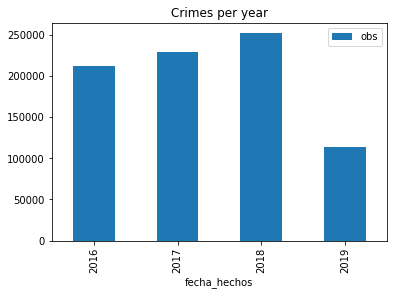

In [67]:
# Plot crimes by year
df.set_index('fecha_hechos', inplace = True) #comment bc it won't work if already run
#using inplace = True is not recommended, df should be treated as immutable
df_count = df.groupby(df.index.year).size().reset_index(name = 'obs')
df_count.plot.bar(title = 'Crimes per year', x = 'fecha_hechos', y = 'obs')
plt.show()

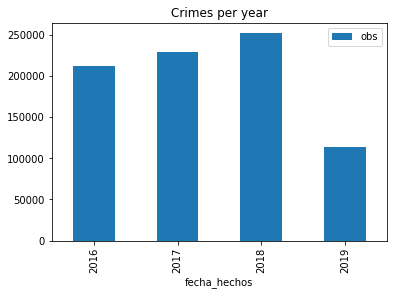

In [68]:
# Plot crimes by year (alternative way)
df.groupby(df.index.year).size().reset_index(name = 'obs').plot.bar(x = 'fecha_hechos', y = 'obs')
#size contea las observaciones, similar a count
plt.title('Crimes per year')
plt.show()

In [69]:
# Show the top 5 crimes
df['delito'].value_counts().head(5)

VIOLENCIA FAMILIAR              69517
ROBO DE OBJETOS                 52214
ROBO A NEGOCIO SIN VIOLENCIA    51426
FRAUDE                          45349
DENUNCIA DE HECHOS              44433
Name: delito, dtype: int64

In [70]:
# Show the top 5 crimes (alternative way)
# This is a df, useful for plotting
df.groupby('delito').size().reset_index(name = 'cantidad').sort_values(by = 'cantidad', ascending = False).head(5)

,delito,cantidad
273,VIOLENCIA FAMILIAR,69517
223,ROBO DE OBJETOS,52214
159,ROBO A NEGOCIO SIN VIOLENCIA,51426
75,FRAUDE,45349
51,DENUNCIA DE HECHOS,44433


In [71]:
# Calculate the accumulated rate of the top 5 crimes 
df.groupby('delito').size().reset_index(name = 'cantidad').sort_values(by = 'cantidad', ascending = False).assign(ratio = lambda x: x['cantidad']/sum(x['cantidad'])*100).head(5)
#El assign hace una columna adicional que indica el ratio

,delito,cantidad,ratio
273,VIOLENCIA FAMILIAR,69517,8.594325
223,ROBO DE OBJETOS,52214,6.455170
159,ROBO A NEGOCIO SIN VIOLENCIA,51426,6.357750
75,FRAUDE,45349,5.606456
51,DENUNCIA DE HECHOS,44433,5.493212


In [72]:
# Which city has the most and the less crimes in the dataset?
df.groupby('alcaldia_hechos').size().reset_index(name = 'cantidad').sort_values(by = 'cantidad', ascending = False)

,alcaldia_hechos,cantidad
122,CUAUHTEMOC,131397
196,IZTAPALAPA,119926
164,GUSTAVO A MADERO,80097
62,BENITO JUAREZ,70599
117,COYOACAN,54235
...,...,...
309,SAIN ALTO,1
112,COPANATOYAC,1
312,SALTILLO,1
313,SALVADOR ALVARADO,1


In [73]:
df_cities = df.groupby('alcaldia_hechos').size().reset_index(name = 'cantidad').sort_values(by = 'cantidad', ascending = False) #lo mismo que arriba pero asignado a un df
df_cities['cantidad'] = df_cities['cantidad'].map('{:,d}'.format)
#tomo la columna cantidad y voy a mapear la función que le va a dar el formato
df_cities

,alcaldia_hechos,cantidad
122,CUAUHTEMOC,"131,397"
196,IZTAPALAPA,"119,926"
164,GUSTAVO A MADERO,"80,097"
62,BENITO JUAREZ,"70,599"
117,COYOACAN,"54,235"
...,...,...
309,SAIN ALTO,1
112,COPANATOYAC,1
312,SALTILLO,1
313,SALVADOR ALVARADO,1


In [74]:
# In each city, what are the top 3 subcities ("Colonias") with most crimes?
df.groupby(['alcaldia_hechos', 'colonia_hechos']).size().to_frame().rename(columns = {0: 'Crímenes'}).sort_values(by=['alcaldia_hechos', 'Crímenes'], ascending = [True, False]).groupby(level = 0).head(3)

Crímenes
alcaldia_hechos        colonia_hechos                                             
ALVARO OBREGON         JARDINES DEL PEDREGAL                                  2335
                       SAN ANGEL                                              2019
                       ZEDEC SANTA FE                                         1843
AZCAPOTZALCO           EL ROSARIO                                             2820
                       INDUSTRIAL VALLEJO                                     1930
                       CENTRO DE AZCAPOTZALCO                                 1796
BENITO JUAREZ          DEL VALLE CENTRO                                      12644
                       NARVARTE                                               9317
                       PORTALES SUR                                           4587
COYOACAN               PEDREGAL DE SANTO DOMINGO                              4434
                       AJUSCO                                                 2377
                       DEL CARMEN                                             2348
CUAJIMALPA DE MORELOS  CUAJIMALPA                                             1693
                       LOMAS DE SANTA FE                                      1655
                       SAN JOSÉ DE LOS CEDROS                                 1008
CUAUHTEMOC             CENTRO                                                28751
                       DOCTORES                                              16657
                       ROMA NORTE                                            10403
CUERNAVACA             CUERNAVACA CENTRO                                         1
ECATEPEC DE MORELOS    EL CHAMIZAL                                               1
GUSTAVO A MADERO       LINDAVISTA                                             3737
                       GUADALUPE TEPEYAC                                      3208
                       SAN FELIPE DE JESÚS                                    2284
HERMOSILLO             EL SAUCITO - CIUDAD                                       1
IZTACALCO              AGRÍCOLA ORIENTAL                                      6663
                       AGRÍCOLA PANTITLAN                                     5476
                       GRANJAS MÉXICO                                         3604
IZTAPALAPA             CENTRAL DE ABASTO                                      5264
                       LOMAS DE SAN LORENZO                                   3060
                       DESARROLLO URBANO QUETZALCOATL                         2990
LA MAGDALENA CONTRERAS SAN JERÓNIMO LÍDICE                                    1452
                       SAN NICOLÁS TOTOLAPAN                                  1008
                       SAN BERNABÉ OCOTEPEC                                    672
MIGUEL HIDALGO         POLANCO                                                7131
                       ANAHUAC                                                3796
                       LOMAS DE CHAPULTEPEC I SECCIÓN                         3196
MILPA ALTA             CRUZTITLA (SAN ANTONIO TECOMITL)                        390
                       SANTA MARTHA (VILLA MILPA ALTA)                         342
                       SAN MIGUEL (SAN PABLO OZTOTEPEC)                        340
NAUCALPAN DE JUAREZ    SAN BARTOLO NAUCALPAN (NAUCALPAN CENTRO) - PUEBLO         2
                       INDUSTRIAL ALCE BLANCO - FRACCIONAMIENTO                  1
                       VISTA DEL VALLE II,III,IV,IX - FRACCIONAMIENTO            1
NEZAHUALCOYOTL         METROPOLITANA 2A SECC                                     1
                       METROPOLITANA 3A SECC                                     1
                       REFORMA                                                   1
OAXACA DE JUAREZ       OAXACA CENTRO                                             1
SAN JUAN GUICHICOVI    RAMOS MILLAN - EJIDO                                      1
TLAHUAC

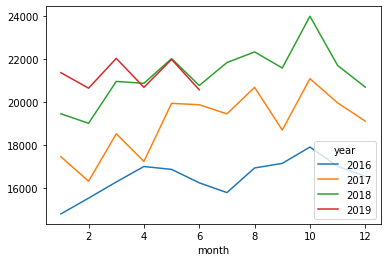

In [75]:
# Do you see a trend per month or day?
# Year
df.groupby([df["fecha_inicio"].dt.year.rename('year'), df['fecha_inicio'].dt.month.rename('month')]).size().unstack('year').plot()

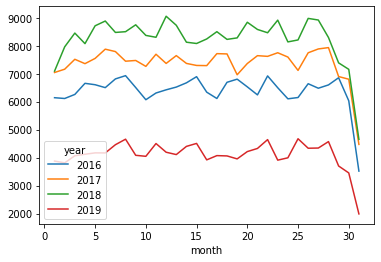

In [77]:
# Day of month
df.groupby([df["fecha_inicio"].dt.year.rename('year'), df['fecha_inicio'].dt.day.rename('month')]).size().unstack('year').plot()

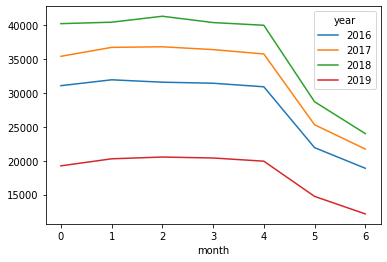

In [78]:
# Day of week
df.groupby([df["fecha_inicio"].dt.year.rename('year'), df['fecha_inicio'].dt.dayofweek.rename('month')]).size().unstack('year').plot()